<a href="https://colab.research.google.com/github/coa-project/coabook/blob/master/test_GeoCountry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://nbviewer.jupyter.org/github/coa-project/coabook/blob/master/test_GeoInfo.ipynb" target="_parent" ><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" height="25"  alt="View in Jupyter nbviewwer" align="middle" /></a>

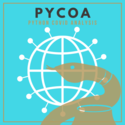

# Testing coa.geo.GeoCountry
[ⓒpycoa.fr](https://pycoa.fr)

This notebook is designed for the v2.0 version of pycoa.

Within the `cocoa.geo`, the `GeoCountry` provide data for specific countries, according to local database needs, such as SPF for France or JHU-USA for US.

## Making  PyCoA available

In [1]:
!pip install --quiet git+https://github.com/coa-project/pycoa.git@v2.0
# !pip install --quiet --user git+https://github.com/coa-project/pycoa.git@v2.0   # One may need to add the --user option at the "pip install" command, if it fails due to privilege lack. Under google colab, you must not add this option.

     |████████████████████████████████| 163kB 6.7MB/s 
     |████████████████████████████████| 61kB 4.8MB/s 
     |████████████████████████████████| 102kB 5.1MB/s 
     |████████████████████████████████| 972kB 10.0MB/s 
     |████████████████████████████████| 10.1MB 23.0MB/s 
     |████████████████████████████████| 286kB 45.4MB/s 
     |████████████████████████████████| 245kB 48.6MB/s 
     |████████████████████████████████| 14.8MB 340kB/s 
     |████████████████████████████████| 6.5MB 57.3MB/s 
     |████████████████████████████████| 245kB 33.9MB/s 
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.12.1 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.4 which is incompatible.


If `pycoa` is already installed on your system but is not in your path, you should specfiy it with the next lines (with the correct path); then please uncomment the second line.

In [2]:
# import sys    # adapt the path for local install, if necessary. Under google colab, do not change anything
# sys.path.insert(1, '../pycoa')   

In [3]:
# testing the correct install of pycoa
import importlib
coa_module_info = importlib.util.find_spec("coa")
if coa_module_info == None:
  raise ModuleNotFoundError("The coa module is not found. Please check your install")

import coa
if coa.__version__ != 'v2.0':
  raise ImportError("The pycoa package version is incorrect. Expecting v2.0")

In [4]:
from coa.geo import GeoCountry as gc

## Getting some help

In [5]:
help(gc)

Help on class GeoCountry in module coa.geo:

class GeoCountry(builtins.object)
 |  GeoCountry class definition.
 |  This class provides functions for specific countries and their states / departments / regions,
 |  and their geo properties (geometry, population if available, etc.)
 |  
 |  The list of supported countries is given by get_list_countries() function.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, country=None, **kwargs)
 |      __init__ member function.
 |      Must give as arg the country to deal with, as a valid ISO3 string.
 |      
 |      Various args :
 |       - dense_geometry (boolean). If True , the geometry of subregions and
 |         region is changed in order to have dense overall geometry.
 |         Default False.
 |       - main_area (boolean). If True, only the geometry of the main area of
 |         the country is taken into account.
 |  
 |  add_field(self, **kwargs)
 |      Return a the data pandas.Dataframe with an additionnal column with prope

## Usage

In [8]:
gc().get_list_countries() # get supported list of countries

['FRA', 'USA']

In [10]:
fra=gc('FRA') # Create the instance of GeoCountry for France

### Informations for a specific country, example of France

In [13]:
fra.get_country() # to get the current country

'FRA'

In [14]:
fra.get_source() # for all available fields

{'FRA': {'Basics': 'https://github.com/coa-project/coadata/raw/main/coacache/public.opendatasoft.com_912711563.zip',
  'Region Flags': 'https://fr.wikipedia.org/w/index.php?title=R%C3%A9gion_fran%C3%A7aise&oldid=177269957',
  'Subregion Flags': 'http://sticker-departement.com/'},
 'USA': {'Basics': 'https://alicia.data.socrata.com/api/geospatial/jhnu-yfrj?method=export&format=Original',
  'Subregion informations': 'https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States'}}

In [15]:
fra.get_list_properties() # list of available properties

['code_chf',
 'code_region',
 'code_subregion',
 'flag_region',
 'flag_subregion',
 'geometry',
 'name_region',
 'name_subregion',
 'town_subregion']

In [16]:
fra.get_region_list() # give region list and some properties as a panda dataframe

,code_region,flag_region,name_region,geometry
0,01,http://upload.wikimedia.org/wikipedia/fr/thumb...,Guadeloupe,"MULTIPOLYGON (((-61.32312 15.94961, -61.31930 ..."
1,02,http://upload.wikimedia.org/wikipedia/fr/thumb...,Martinique,"POLYGON ((-61.20404 14.86191, -61.18519 14.870..."
2,03,http://upload.wikimedia.org/wikipedia/fr/thumb...,Guyane,"MULTIPOLYGON (((-52.56490 5.10580, -52.56106 5..."
3,04,http://upload.wikimedia.org/wikipedia/fr/thumb...,La Réunion,"POLYGON ((55.25415 -21.10974, 55.23161 -21.091..."
4,06,http://upload.wikimedia.org/wikipedia/fr/thumb...,Mayotte,"MULTIPOLYGON (((45.27135 -12.79331, 45.26369 -..."
5,11,http://upload.wikimedia.org/wikipedia/commons/...,Île-de-France,"POLYGON ((2.59042 49.07967, 2.59060 49.07992, ..."
6,24,http://upload.wikimedia.org/wikipedia/fr/thumb...,Centre-Val de Loire,"POLYGON ((2.86690 47.51709, 2.87496 47.52029, ..."
7,27,http://upload.wikimedia.org/wikipedia/commons/...,Bourgogne-Franche-Comté,"POLYGON ((6.94021 47.43368, 6.94054 47.43337, ..."
8,28,http://upload.wikimedia.org/wikipedia/fr/thumb...,Normandie,"MULTIPOLYGON (((0.29722 49.42986, 0.34059 49.4..."
9,32,http://upload.wikimedia.org/wikipedia/fr/thumb...,Hauts-de-France,"POLYGON ((1.72983 49.56129, 1.71478 49.57640, ..."


In [17]:
fra.get_subregion_list() # give subregion list and some properties as a panda dataframe

,code_subregion,flag_subregion,name_subregion,town_subregion,geometry
53,01,http://sticker-departement.com/img/dept/sticke...,AIN,BOURG-EN-BRESSE,"POLYGON ((4.80255 46.15643, 4.79859 46.16053, ..."
79,02,http://sticker-departement.com/img/dept/sticke...,AISNE,LAON,"POLYGON ((3.12039 49.70573, 3.11654 49.71895, ..."
89,03,http://sticker-departement.com/img/dept/sticke...,ALLIER,MOULINS,"POLYGON ((2.53665 46.51970, 2.55403 46.52939, ..."
35,04,http://sticker-departement.com/img/dept/sticke...,ALPES-DE-HAUTE-PROVENCE,DIGNE-LES-BAINS,"POLYGON ((5.63114 44.15058, 5.65522 44.14756, ..."
9,05,http://sticker-departement.com/img/dept/sticke...,HAUTES-ALPES,GAP,"POLYGON ((5.95112 44.75962, 5.95290 44.77114, ..."
...,...,...,...,...,...
43,971,http://sticker-departement.com/img/dept/sticke...,GUADELOUPE,BASSE-TERRE,"MULTIPOLYGON (((-61.63356 15.83977, -61.64799 ..."
58,972,http://sticker-departement.com/img/dept/sticke...,MARTINIQUE,FORT-DE-FRANCE,"POLYGON ((-61.20404 14.86191, -61.18519 14.870..."
0,973,http://sticker-departement.com/img/dept/sticke...,GUYANE,CAYENNE,"MULTIPOLYGON (((-53.87049 5.74494, -53.86464 5..."
90,974,http://sticker-departement.com/img/dept/sticke...,REUNION,SAINT-DENIS,"POLYGON ((55.25415 -21.10974, 55.23161 -21.091..."


In [20]:
fra.get_subregions_from_region(name='Bretagne') # list of subregion codes for a given region name

['22', '29', '35', '56']

In [22]:
fra.get_subregions_from_region(code='11') # list of subregion codes for a given region code

['75', '77', '78', '91', '92', '93', '94', '95']

In [24]:
fra.get_subregions_from_list_of_region_names(['Normandie','Hauts-de-France']) # list of subregion codes for a given list of region names

['14', '27', '50', '61', '76', '02', '59', '60', '62', '80']

### Example of USA usage

In [26]:
usa=gc('USA')

In [27]:
usa.get_region_list()

,code_region,name_region,geometry
0,East North Central,East North Central,"MULTIPOLYGON (((-88.07159 37.51104, -88.08791 ..."
1,East South Central,East South Central,"POLYGON ((-88.40142 30.39355, -88.39923 30.352..."
2,Middle Atlantic,Middle Atlantic,"MULTIPOLYGON (((-73.29306 40.62638, -73.29114 ..."
3,Mountain,Mountain,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
4,New England,New England,"MULTIPOLYGON (((-70.03172 41.31193, -70.00651 ..."
5,Pacific,Pacific,"MULTIPOLYGON (((-155.66619 18.92179, -155.7785..."
6,South Atlantic,South Atlantic,"MULTIPOLYGON (((-80.24945 25.35494, -80.35567 ..."
7,West North Central,West North Central,"POLYGON ((-89.10503 36.95392, -89.12965 36.866..."
8,West South Central,West South Central,"MULTIPOLYGON (((-92.01637 29.59648, -91.90255 ..."


In [28]:
usa.get_subregion_list()

,area_subregion,code_subregion,flag_subregion,name_subregion,population_subregion,town_subregion,geometry
50,1723337.0,AK,http://upload.wikimedia.org/wikipedia/commons/...,Alaska,731545.0,Juneau,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
42,135767.0,AL,http://upload.wikimedia.org/wikipedia/commons/...,Alabama,4903185.0,Montgomery,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
46,137732.0,AR,http://upload.wikimedia.org/wikipedia/commons/...,Arkansas,3017804.0,Little Rock,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
36,295234.0,AZ,http://upload.wikimedia.org/wikipedia/commons/...,Arizona,7278717.0,Phoenix,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
24,423967.0,CA,http://upload.wikimedia.org/wikipedia/commons/...,California,39512223.0,Sacramento,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."
31,269601.0,CO,http://upload.wikimedia.org/wikipedia/commons/...,Colorado,5758736.0,Denver,"POLYGON ((-102.04446 37.64147, -102.04201 37.3..."
18,14357.0,CT,http://upload.wikimedia.org/wikipedia/commons/...,Connecticut,3565278.0,Hartford,"POLYGON ((-73.53039 41.52275, -73.51715 41.665..."
27,NaN,DC,NaN,District of Columbia,NaN,NaN,"POLYGON ((-77.00793 38.96667, -76.91090 38.890..."
28,6446.0,DE,http://upload.wikimedia.org/wikipedia/commons/...,Delaware,973764.0,Dover,"POLYGON ((-75.70707 38.55759, -75.71071 38.649..."
48,170312.0,FL,http://upload.wikimedia.org/wikipedia/commons/...,Florida,21477737.0,Tallahassee,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ..."


In [31]:
usa.get_subregions_from_region(name='Mountain')

['AZ', 'CO', 'ID', 'MT', 'NM', 'NV', 'UT', 'WY']

## Management of errors

As far as possible, errors are managed within the `cocoa.error` framework. `CocoaError` should be raised.

In [32]:
gc('GBR') # unknown country within GeoCountry

CoaKeyError: ignored

In [33]:
fra.get_subregions_from_region() # no arg

CoaKeyError: ignored

In [34]:
fra.get_subregions_from_region(name='nowhere') # bad arg

CoaWhereError: ignored